# 20240124

## 분류 평가

분류 모델 평가 지표

정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 Score, ROC AUC. 이러한 지표들은 모델의 성능을 다양한 관점에서 평가하는 데 중요.

정확도 (Accuracy):
- 정확도는 가장 직관적인 분류 성능 평가 지표. 모델이 전체 데이터 중 얼마나 정확하게 예측했는지를 나타낸다.
- 계산 방법: (정확히 예측된 데이터의 수) / (전체 데이터의 수)

정밀도 (Precision):
- 정밀도는 양성(Positive)으로 예측된 데이터 중 실제로 양성인 데이터의 비율. 즉, 모델이 '양성'이라고 예측한 것들 중 실제 '양성'인 경우의 비율.
- 계산 방법: TP / (TP + FP)
여기서 TP(True Positive)는 실제 양성을 양성으로 올바르게 예측한 경우, FP(False Positive)는 실제 음성을 잘못해서 양성으로 예측한 경우.

재현율 (Recall) 또는 민감도 (Sensitivity):
- 재현율은 실제 양성인 데이터 중 모델이 양성으로 올바르게 예측한 데이터의 비율. 즉, 실제 '양성'인 경우들 중 모델이 얼마나 잘 잡아내는지를 나타낸다.
- 계산 방법: TP / (TP + FN)
여기서 FN(False Negative)는 실제 양성을 잘못해서 음성으로 예측한 경우.

F1 Score:
- F1 Score는 정밀도와 재현율의 조화 평균(harmonic mean). 모델이 양성 데이터를 얼마나 잘 예측하는지에 대한 전반적인 측정치로, 특히 불균형 데이터셋에서 유용.
- 계산 방법: 2 * (Precision * Recall) / (Precision + Recall)

ROC AUC (Receiver Operating Characteristic - Area Under Curve):
- ROC 곡선은 모델이 양성 클래스를 어떻게 잘 예측하는지에 대한 성능을 그래프로 나타낸 것. 이 곡선은 재현율과 1-특이성(실제 음성 중 잘못 양성으로 예측한 비율)의 관계를 나타낸다.
- AUC(Area Under the ROC Curve) 값은 ROC 곡선 아래의 면적을 의미하며, 이 값이 클수록 모델의 성능이 좋다고 평가. AUC는 0과 1 사이의 값을 가지며, 1에 가까울수록 더 좋은 모델.

P,N 은 예측한것. 즉 양성 혹은 음성으로 예측.
T,F 는 예측한게 맞고 틀린 것. 그래서 FP 는 예측은 P인데 실제는 N.


* TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP) <- 분모: 양성 예측
* 재현율 = TP / ( TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐. <- 분모: 실제 양성
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생

#### 정밀도/제현율 트레이드오프
* 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
* 정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off) 관계임



#### 예측 확률을 반환하는 predict_proba() <- 그냥 predict를 쓰면 임계값을 0.5로 알아서 하지만 이 function을 하면 예측한 것을 0이될 확률 1이될 확률로 뽑아준다.
* 사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
* 그리고 예측 확률이 큰 레이블 값으로 예측
* 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
* 이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함
* 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
* predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값 (즉 예로 0과 1)이 아닌 예측 확률 결과임



In [ ]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
  return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [ ]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

titanic_df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m5_ml/dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
# print(pred[:10])
# print(y_test[:10])
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.8491620111731844

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:3]

array([[0.46197474, 0.53802526],
       [0.87872398, 0.12127602],
       [0.87719492, 0.12280508]])

In [ ]:
pred = lr_clf.predict(X_test)
print(pred[:3])
pred.reshape(-1,1)[:3]
# 결과 값에서 처음 1은 위의 pred_proba의 1행2열이 0.53 임으로 1이 나왔고
# 결과 값에서 나머지 2,3은 위의 pred_proba의 1열 값이 0.87 임으로 0이 나왔다.

[1 0 0]


array([[1],
       [0],
       [0]])

In [ ]:
import numpy as np
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])
type(pred_proba_result)

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46197474 0.53802526 1.        ]
 [0.87872398 0.12127602 0.        ]
 [0.87719492 0.12280508 0.        ]]


numpy.ndarray

#### Binarizer

In [ ]:
# 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정
# threshold 변수를 특정 값으로 설정하고 사이킷런의 Binarizer클래스를 객체로 생성
# fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값이
# threshold보다 같거나 작으면 0, 크면 1값 반환

from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1) # threshold=1이면 마지막 행의 2열이 1로 바뀐다.
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
# 생존 확률을 선택해서 임곗값 0.5를 기준과 비교하여 예측
from sklearn.preprocessing import Binarizer
custom_threshold = 0.5 # 이것을 0.14로 바꾼다던지 해서 임곗값을 customize 할 수 있다.
print('pred_proba: \n', pred_proba[0:5])
print()
# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률: \n', pred_proba_1[0:5])
print()
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)
custom_predict[0:5]

pred_proba: 
 [[0.46197474 0.53802526]
 [0.87872398 0.12127602]
 [0.87719492 0.12280508]
 [0.88259275 0.11740725]
 [0.85524671 0.14475329]]

생존확률: 
 [[0.53802526]
 [0.12127602]
 [0.12280508]
 [0.11740725]
 [0.14475329]]



array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

#### 오차행렬(Confusion Matrix)
- 분류 문제에서 모델의 성능을 평가하는 데 사용되는 중요한 도구. 이 행렬은 실제 값과 모델의 예측 값을 비교하여, 어떤 종류의 오류가 발생하고 얼마나 자주 발생하는지를 나타낸다.
- 오차행렬은 주로 이진 분류 문제에서 사용되지만, 다중 클래스 분류 문제에서도 확장해서 사용할 수 있다.

기본적인 이진 분류에서의 오차행렬은 다음과 같이 2x2 행렬로 구성


In [ ]:
#scikit-learn confusion matrix
        Predict
          N   T
Actual  N TN  FP
        T FN  TP

In [ ]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1 score: {3:4f}'.format(accuracy, precision,recall,f1))

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1 score: 0.780488


Q. pred와 y_test를 배열로 만든 후 동일한 인덱스에서 0이 일치하는 경우와 1이 모두 일치하는 경우의 수를 산출하세요.

In [ ]:
import numpy as np

# 예시 배열 생성
array1 = pred
array2 = y_test.values

# 동일한 인덱스에서 0이 모두 일치하는 경우의 수
matching_zeros = np.sum((array1 == 0) & (array2 == 0))

# 동일한 인덱스에서 1이 모두 일치하는 경우의 수
matching_ones = np.sum((array1 == 1) & (array2 == 1))

matching_zeros, matching_ones

(104, 48)

Q. 오차 행렬을 통해 직접 수작업으로 지표 계산

In [ ]:
TN = 104;TP=48;FN=14;FP=13

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
print(f'정확도:{round(accuracy,2)}, 정밀도:{round(precision,2)}, 재현율: {round(recall,2)}, F1 score: {round(f1,2)}')

정확도:0.85, 정밀도:0.79, 재현율: 0.77, F1 score: 0.78


In [ ]:
# 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준
# 임곗값을 낮출수록 True 값이 많아지게 되며 Positive 예측값이 많아지면
# FN은 하락해서 재현율은 올라감
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도: 0.7183, 재현율: 0.8361, f1 score: 0.772727


In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list객체내의 값을 차례로 iteration 하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold =custom_threshold)
    custom_predict = binarizer.fit_transform(pred_proba_c1)
    print('임곗값:', custom_threshold)

    get_clf_eval(y_test, custom_predict)
    print()
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# 임곗값이 올라갈 수록 재현율은 떨어지고 정밀도는 올라간다. 임곗값이 올라간다는 것은 음성으로 많이 예측하게 되기 때문에
# 임곗값이 올라갈 수록 재현율의 분모를 계산하는 값이 올라가고 반대로 정밀도의 분모를 계산하는 값이 내려가기 때문이다.

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도: 0.7183, 재현율: 0.8361, f1 score: 0.772727

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도: 0.7656, 재현율: 0.8033, f1 score: 0.784000

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1 score: 0.780488

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도: 0.8364, 재현율: 0.7541, f1 score: 0.793103

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도: 0.8824, 재현율: 0.7377, f1 score: 0.803571



#### # precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화 하는데 이용



[0.011625102594233485, 0.052929569115889266, 0.06229232864889147, 0.06365454747341409, 0.06864341785613658, 0.07101242400226516, 0.07237512824382179, 0.07413535552924568, 0.07564848973847178, 0.07569338532386273, 0.08334237031953001, 0.09124142229977557, 0.09160065363657287, 0.09161985907466705, 0.09452141141741671, 0.09456490475783855, 0.09626268113176142, 0.0975076713182398, 0.10021186276125035, 0.10067976671432884, 0.10073100672153161, 0.10122939906487183, 0.10387870313011927, 0.10388093741571346, 0.10390600621928625, 0.10786201464108118, 0.10884982550820926, 0.11153693970957321, 0.11157386865528282, 0.11158268789414887, 0.11195213235700682, 0.11198655357580917, 0.11619222304712938, 0.11705691210358714, 0.11740724895567668, 0.11777439272410725, 0.11801245993777755, 0.1212760186610418, 0.12275070401103429, 0.12280507731100139, 0.12280611526567695, 0.12281103788399952, 0.12438074699217938, 0.12495853612359047, 0.12545087652897932, 0.126896110430839, 0.1283299631101594, 0.1288494243054

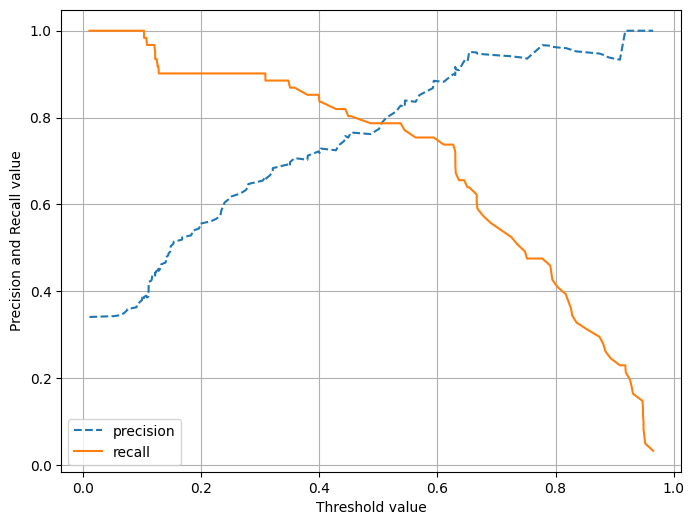

In [ ]:
# precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로
# 시각화 하는데 이용
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  print(list(thresholds))
  print(thresholds.shape)
  threshold_boundary = thresholds.shape[0]
  print(threshold_boundary)
  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim() # 플롯의 x축의 현재 한계를 반환

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

##### 결과 해석
* 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐.(FN이 작아지고 FP가 커짐)
* 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임.
* 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

#### ROC 곡선과 AUC
* 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
* FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타냄.
* 특이성은 실제로 음성인 사례들 중에서 모델이 음성으로 예측한 사례의 비율 즉 TNR
* TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
* FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨.
* FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

In [ ]:
from sklearn.metrics import roc_curve
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
thr_index = np.arange(1, thresholds.shape[0],5)
print(np.round(thresholds[thr_index],2))
print(np.round(fprs[thr_index],2))
print(np.round(tprs[thr_index],2))

[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
[0.   0.02 0.03 0.08 0.13 0.17 0.2  0.47 0.58 0.69 0.8 ]
[0.03 0.64 0.72 0.75 0.8  0.84 0.89 0.9  0.93 0.97 0.98]


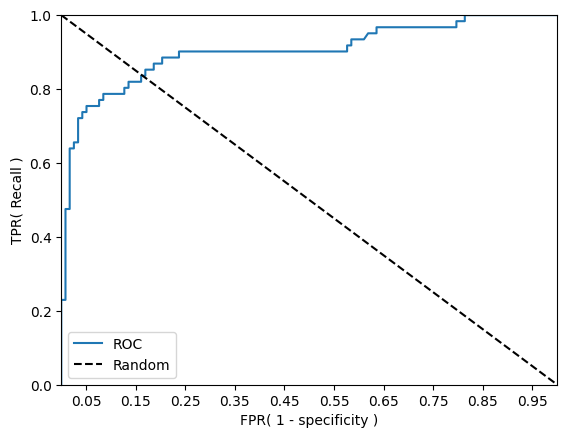

In [ ]:
# ROC_Curve는 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커지는데
# FPR이 조금씩 커질 때 TPR은 가파르게 커짐을 알 수 있음
# AUC가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR 을 얻을 수 있느냐가 관건
# 가운데 대각선 직선은 랜덤 수준의 이진 분류 AUC 값으로 0.5이며 일반적으로 분류는 0.5 이상의 AUC 값을 가짐
import matplotlib.pyplot as plt
def roc_curve_plot(y_test, pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환 받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

  # ROC Curve를 plot 곡선으로 그림.
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0,1],[1,0],'k--', label='Random')

  # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR( 1 - specificity )'); plt.ylabel('TPR( Recall )')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [ ]:
TPR = TP/(TP + FN)
FPR = FP/(TN + FP)

In [ ]:
# ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며
# 분류의 성능 지표로 사용되는 것은 ROC 곡선이며 면적에 기반한 AUC값으로 결정
# AUC 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치임
# AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건임
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
def get_clf_eval(y_test, pred, pred_proba):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805, AUC:0.9024


##### Q. diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']는 0값을 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압),
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m5_ml/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# zero_features는 0값을 평균값으로 대체
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

for feature in zero_features:
  df[feature].replace(0,df[feature].mean(),inplace=True)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 모델링
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.Outcome, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
def get_clf_eval(y_test, pred, pred_proba):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
# pred_proba 계산
pred_proba = lr_clf.predict_proba(X_test)[:,1]
# 작성한 함수에서 결과 도출
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[90 10]
 [26 28]]
정확도: 0.7662, 정밀도: 0.7368, 재현율: 0.5185, F1: 0.6087, AUC:0.8328


[0.01890323084214803, 0.032694367265516756, 0.03458546493292658, 0.038878786986143415, 0.040593353985195264, 0.04328038977822485, 0.049372663875066475, 0.0494576299617146, 0.051411303672461904, 0.054545879008564446, 0.05582969510987805, 0.05689005505007377, 0.057099254823095594, 0.058849120322696145, 0.059911527003735185, 0.06065518303223398, 0.06197555402020172, 0.06582011937825824, 0.07018657155126949, 0.07047781064313488, 0.07084894855876525, 0.07183391604809687, 0.07257920124133908, 0.07463269331755282, 0.07492357056134272, 0.08728577248075436, 0.08733150745423508, 0.08791318481535172, 0.09084700608532403, 0.09539687118441849, 0.09843772360634954, 0.09880867670975316, 0.10012999972436262, 0.10652319420790021, 0.10717019592927629, 0.1095900790266604, 0.1198406111730819, 0.12182189538152258, 0.12216975857952535, 0.12469990289474646, 0.12989485428869932, 0.13101830094787853, 0.13436379264457438, 0.14243888636617202, 0.14476622305459966, 0.14599063086963507, 0.14744067301757557, 0.1478

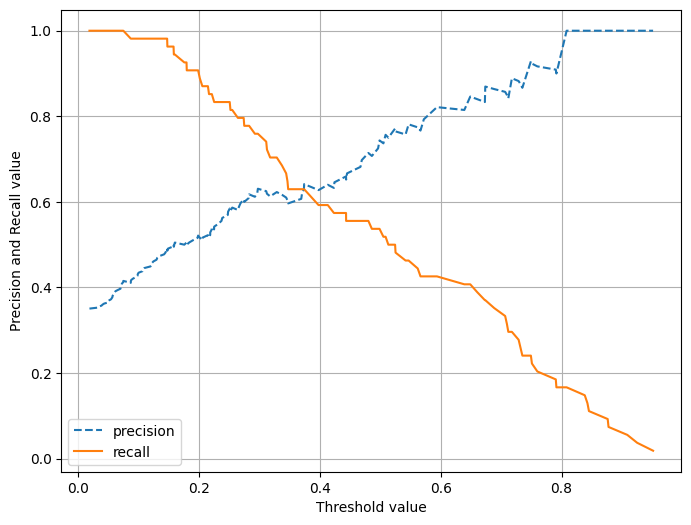

In [9]:
# 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
# precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로
# 시각화 하는데 이용
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  print(list(thresholds))
  # print(list(precisions))
  # print(len(thresholds))
  # print(len(precisions))
  # print(len(recalls))
  # curve_values 라는 데이터프래임을 통해 값을 볼것임

  # curve_values = pd.DataFrame(np.concatenate((precisions.reshape(-1,1),recalls.reshape(-1,1),thresholds.reshape),axis=1), columns=['precisions','recalls','thresholds'])
  # print(curve_values)
  print(thresholds.shape)
  threshold_boundary = thresholds.shape[0]
  print(threshold_boundary)
  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim() # 플롯의 x축의 현재 한계를 반환

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, pred_proba)

In [11]:
from sklearn.preprocessing import Binarizer
# 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list객체내의 값을 차례로 iteration 하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold =custom_threshold)
    custom_predict = binarizer.fit_transform(pred_proba_c1)
    print('임곗값:', custom_threshold)

    get_clf_eval(y_test, custom_predict)
    print()
get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)

임곗값: 0.01890323084214803


TypeError: get_clf_eval() missing 1 required positional argument: 'pred_proba'

In [12]:
######### 강사님 답안

# 768개의 데이터중에서 Negative 값 0이 500개, Positive 값 1이 268개임

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/drive/MyDrive/KITA_1026/m5_ml/dataset/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [13]:
# 평가 지표 함수
def get_clf_eval(y_test=None, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬:\n', confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [15]:
# 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
  # threshold ndarray와 이 threshold에 따른 정밀도 ,재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 thresholds값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는
  # 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X 축의 Scale을 0.1단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()


In [16]:
# 예측 모델 생성
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출
import warnings
warnings.filterwarnings('ignore')
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156,\
                                                    stratify=y)
# stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록
# 할 것인지 지정한다. 예를 들어 0,1의 클래스가 input dataset에 20:80 비율로 있었다면
# 훈련 데이터와 테스트 데이터 역시 각각의 클래스가 같은 비율로 있도록 지정

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.7919


In [17]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
diabetes_data[diabetes_data.Glucose==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


<Axes: xlabel='Glucose', ylabel='Count'>

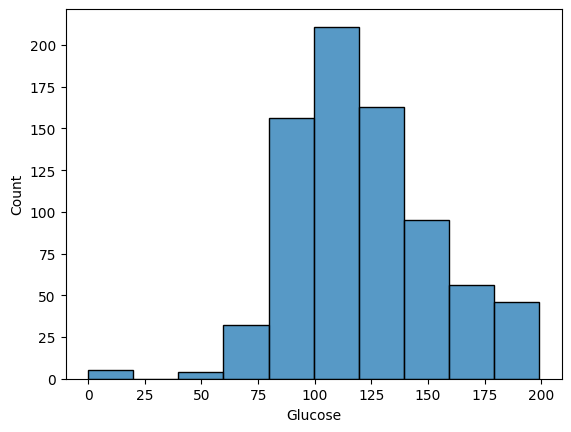

In [19]:
import seaborn as sns

sns.histplot(diabetes_data['Glucose'],bins=10)

In [21]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# Pregnancies는 출산 횟수를 의미하므로 제외

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  total_count = diabetes_data[feature].count()
  print('{0} 0 건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

# SkinThickness와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체

Glucose 0 건수는 5, 퍼센트 0.65 %
BloodPressure 0 건수는 35, 퍼센트 4.56 %
SkinThickness 0 건수는 227, 퍼센트 29.56 %
Insulin 0 건수는 374, 퍼센트 48.70 %
BMI 0 건수는 11, 퍼센트 1.43 %


In [23]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [24]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
# 로지스틱 회귀의 일반적으로 숫자 데이터에 스케일링을 하는 것이 좋으며
# 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용, 성능 평가 지표를 확인

X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

# 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선되었으나 재현율 수치는 개선 필요

오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


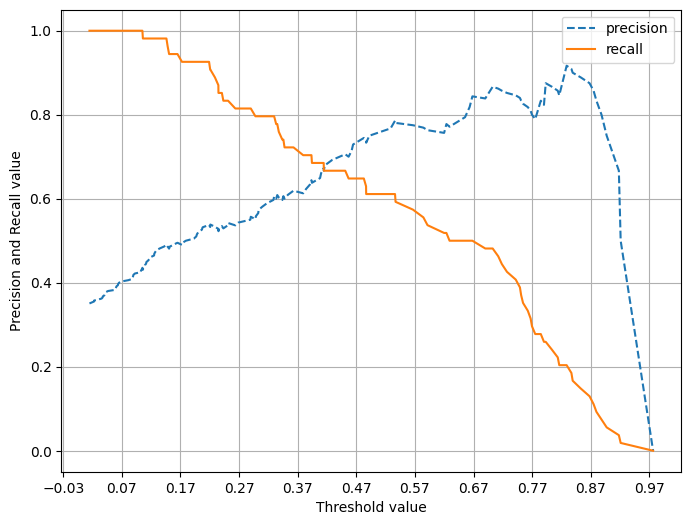

In [27]:
precision_recall_curve_plot(y_test, pred_proba)
# 임곗값을 0.42로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞출 것 같으나
# 모두 0.7이 안되는 낮은 수치를 보임

In [28]:
# 임곗값에 따른 평가 수치 출력 함수
from sklearn.preprocessing import Binarizer
pred_proba_c1 = pred_proba.reshape(-1,1)
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)
    print()

In [29]:
# 임곗값은 0.3에서 0.5까지 변화시키면서 평가 지표 확인
# 임곗값을 0.3~0.5를 본 이유는 재현율을 높이고 다른 지표들을 유지하는 식이기 때문에 재현율을 높이려면 숫자가 작아져야 한다.
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
get_eval_by_threshold(y_test, pred_proba_c1, thresholds)

임곗값: 0.3
오차 행렬:
 [[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC: 0.8433

임곗값: 0.33
오차 행렬:
 [[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC: 0.8433

임곗값: 0.36
오차 행렬:
 [[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC: 0.8433

임곗값: 0.39
오차 행렬:
 [[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8433

임곗값: 0.42
오차 행렬:
 [[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC: 0.8433

임곗값: 0.45
오차 행렬:
 [[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8433

임곗값: 0.48
오차 행렬:
 [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433

임곗값: 0.5
오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433



In [32]:
# 재현율을 약간 올리면서 전체적인 성능 평가 지표를 올리는 임곗값: 0.48

get_eval_by_threshold(y_test, pred_proba_c1, [0.3, 0.48, 0.5])

임곗값: 0.3
오차 행렬:
 [[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC: 0.8433

임곗값: 0.48
오차 행렬:
 [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433

임곗값: 0.5
오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433



임계값을 변경하면 재현율(Recall)과 정밀도(Precision)가 변화하지만 AUC(Area Under the Curve)는 동일하게 유지되는 이유는 AUC가 임계값의 변화에 무관한 평가 지표이기 때문이다.

- 재현율과 정밀도의 변화: 임계값을 변경하면 분류기가 어떤 예측을 '긍정' 또는 '부정'으로 분류할지 기준이 바뀌며 이에 따라 True Positive, False Positive, True Negative, False Negative의 수가 변하게 되며 이는 재현율과 정밀도를 직접적으로 영향을 미친다.

- AUC의 불변성: AUC는 ROC(Receiver Operating Characteristic) 곡선 아래의 면적을 의미. ROC 곡선은 모든 가능한 임계값에 대해 True Positive Rate(TPR, 재현율)과 False Positive Rate(FPR)을 플롯한 것이다. AUC는 이 곡선 아래의 전체 면적을 측정하는 것이므로, 특정 임계값에서의 성능 변화보다는 분류기의 전반적인 성능을 평가. 이 때문에 임계값이 변해도 AUC 값은 동일하게 유지된다.

- 결론적으로, 재현율과 정밀도는 특정 임계값에서의 성능을 나타내는 반면, AUC는 분류기의 전체적인 성능을 종합적으로 평가하는 지표로, 임계값의 변화에 영향을 받지 않는다.